In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/main/dataset/Stroke%20Prediction%20Dataset/healthcare-dataset-stroke-data.csv")
df.shape

(5110, 12)

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Text(0.5, 1.0, 'Null Values in Data Frame')

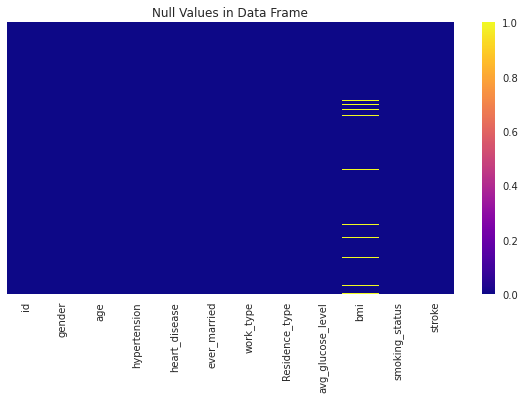

In [6]:
plt.style.use('seaborn')
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), yticklabels = False, cmap = 'plasma')
plt.title('Null Values in Data Frame')

In [7]:
missing_value_count = (df.isnull().sum())
print(missing_value_count[missing_value_count > 0])
total_cells = np.product(df.shape)
total_missing_value = missing_value_count.sum()
print('Percentage of missing value in Data Frame is:', total_missing_value / total_cells*100)
print('Total number of our cells is:', total_cells)
print('Total number of our missing value is:', total_missing_value)

bmi    201
dtype: int64
Percentage of missing value in Data Frame is: 0.32778864970645794
Total number of our cells is: 61320
Total number of our missing value is: 201


In [10]:
df["bmi"].fillna(df["bmi"].mean(), inplace=True)
df["bmi"].isnull().sum()

0

In [14]:
data_eda = df.copy()
data_eda["hypertension"]     = df["hypertension"]    .map({1: "Yes",           0: "No"})
data_eda["stroke"]     = df["stroke"]    .map({1: "Yes",           0: "No"})
data_eda["heart_disease"]  = df["heart_disease"] .map({1: "Yes" ,           0: "No"})

In [15]:
def cnditioning_linear_plot(x,y,hue,df):
    sns.lmplot(x=x, y=y, hue=hue, data=df,
               markers=["o", "x"], palette="Set1")
def count_bar_plot(df,x,hue,title):
    fig = sns.countplot(x=x, hue=hue, data=df)
    fig.set_title(title)
def pie_graph(df,title,values):   
    labels = df[values].value_counts().index
    values = df[values].value_counts()

    fig = go.Figure(data = [
        go.Pie(
        labels = labels,
        values = values,
        hole = .5)
    ])

    fig.update_layout(title_text = title)
    fig.show()
def distplot(x):
    ax = sns.distplot(data_eda[x], rug=True, rug_kws={"color": "g"},
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})
def horizontal_bar_chart(df,x,y,color,title):    
    fig = px.bar(df, x=x, y=y, color=color,                  
                 height=600,
                 title=title)
    fig.show()

In [16]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


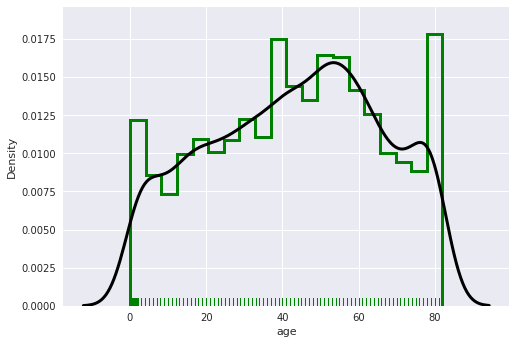

In [17]:
distplot("age")

In [18]:

def age_cohort(age):
    if   age >= 0 and age <= 20:
        return "0-20"
    elif age > 20 and age <= 40:
        return "20-40"
    elif age > 40 and age <= 50:
        return "40-50"
    elif age > 50 and age <= 60:
        return "50-60"
    elif age > 60:
        return "60+"
    
data_eda['age group'] = data_eda['age'].apply(age_cohort)
data_eda.sort_values('age group', inplace = True)
pie_graph(data_eda,"Age Group Distribution",'age group')
pie_graph(data_eda, 'Gender Distribution','gender')
pie_graph(data_eda, 'Hypertension Distribution','hypertension')
pie_graph(data_eda, ' Heart disease Distribution','heart_disease')
pie_graph(data_eda, 'Ever married  Distribution','ever_married')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2103: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.



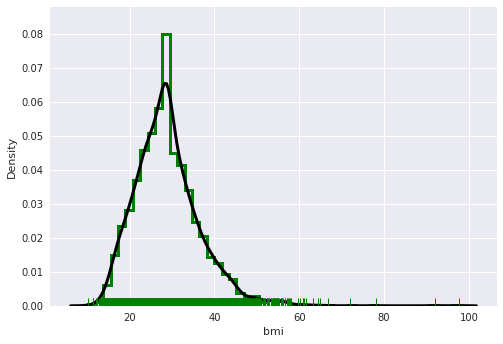

In [19]:
distplot('bmi')

In [20]:
pie_graph(data_eda, 'Work type Distribution','work_type')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2103: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.



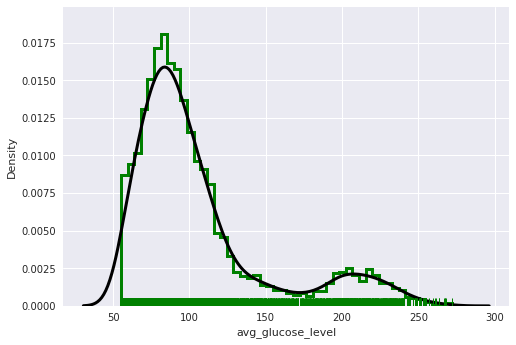

In [21]:
distplot('avg_glucose_level')

In [22]:
pie_graph(data_eda, 'Residence type Distribution','Residence_type')
pie_graph(data_eda,'Smoking Status Distribution','smoking_status')
pie_graph(data_eda, 'Stroke Distribution', 'stroke')

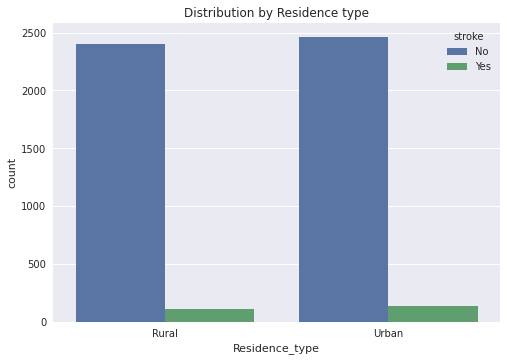

In [24]:
count_bar_plot(data_eda,'Residence_type','stroke','Distribution by Residence type')

group = data_eda.groupby(['stroke','smoking_status'],as_index = False).size().sort_values(by='size')
horizontal_bar_chart(df = group,x = 'stroke',y = 'size',color = 'smoking_status',title = 'Distribution of stroke by smoking status')

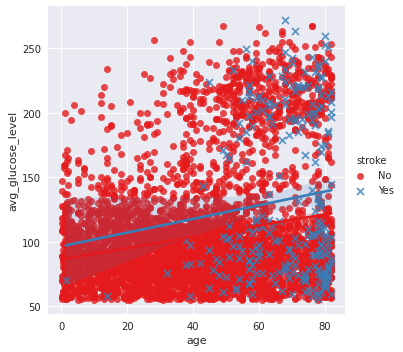

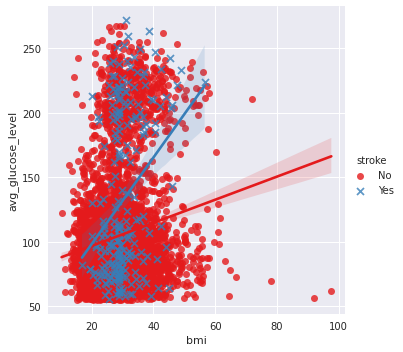

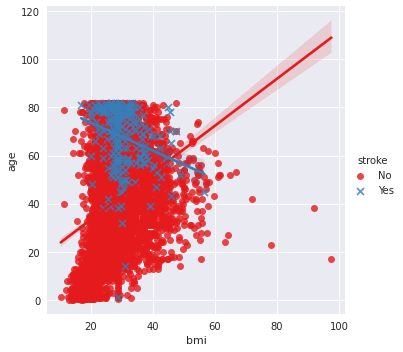

In [25]:
cnditioning_linear_plot('age','avg_glucose_level','stroke',data_eda)

cnditioning_linear_plot('bmi','avg_glucose_level','stroke',data_eda)

cnditioning_linear_plot('bmi','age','stroke',data_eda)

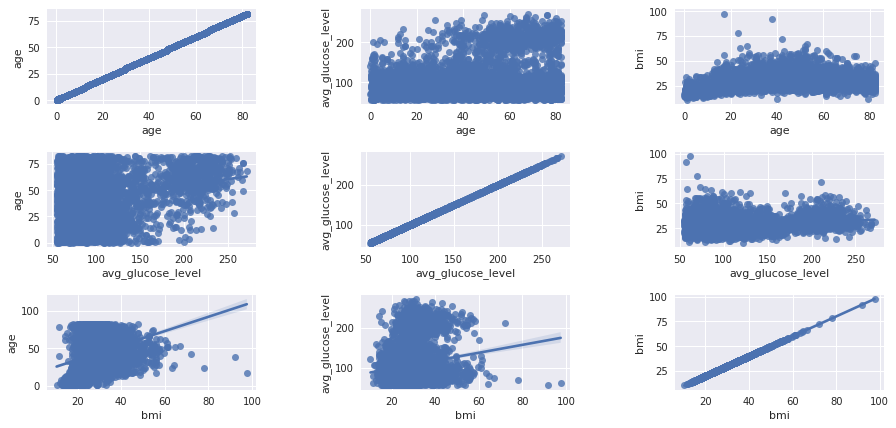

In [26]:
plt.figure(1, figsize=(15,7))
n = 0
for x in ['age','avg_glucose_level','bmi']:
    for y in ['age','avg_glucose_level','bmi']:
        n += 1
        plt.subplot(3,3,n)
        plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
        sns.regplot(x = x, y = y, data = df)
        plt.ylabel(y.split()[0] + ' ' + y.split()[1] if len(y.split()) > 1 else y)

plt.show()

<AxesSubplot:>

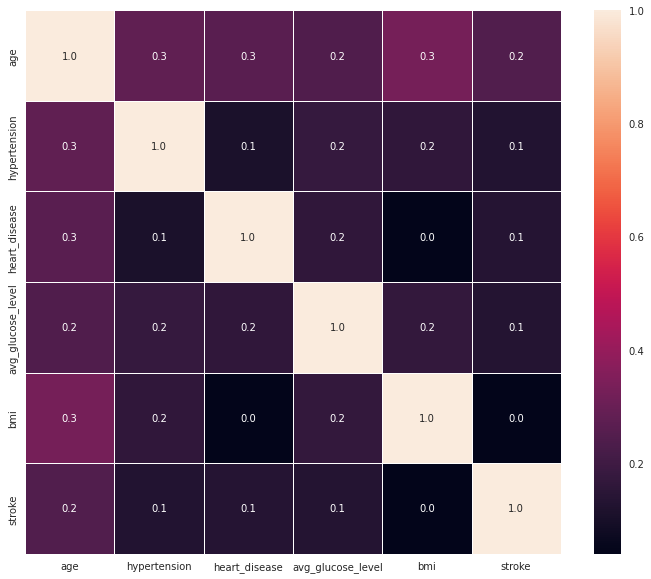

In [27]:
f, ax = plt.subplots(figsize = (12,10))
sns.heatmap(df.corr(),
            annot = True,
            linewidths = .5,
            fmt = '.1f',
            ax = ax)

In [28]:
df.corr()["stroke"].sort_values(ascending = False)

stroke               1.000000
age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
bmi                  0.038947
Name: stroke, dtype: float64

In [29]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [30]:
object_col = ["gender", "ever_married" ,"Residence_type"]
label_encoder = preprocessing.LabelEncoder()
for col in object_col:
    df[col]=  label_encoder.fit_transform(df[col])
df.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,1,228.69,36.600000,formerly smoked,1
1,0,61.0,0,0,1,Self-employed,0,202.21,28.893237,never smoked,1


In [32]:
df = pd.get_dummies(df)
df.head(2)

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.600000,1,0,0,1,0,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,28.893237,1,0,0,0,1,0,0,0,1,0


In [33]:
df.shape

(5110, 18)

In [34]:
X = df.drop(columns = ['stroke'])
y = df['stroke']

In [35]:
sm = SMOTE(random_state=123)
X_sm , y_sm = sm.fit_resample(X,y)

print(f'''Shape of X before SMOTE:{X.shape}
Shape of X after SMOTE:{X_sm.shape}''',"\n\n")

print(f'''Target Class distributuion before SMOTE:\n{y.value_counts(normalize=True)}
Target Class distributuion after SMOTE :\n{y_sm.value_counts(normalize=True)}''')

Shape of X before SMOTE:(5110, 17)
Shape of X after SMOTE:(9722, 17) 


Target Class distributuion before SMOTE:
0    0.951272
1    0.048728
Name: stroke, dtype: float64
Target Class distributuion after SMOTE :
1    0.5
0    0.5
Name: stroke, dtype: float64


In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X_sm,
    y_sm,
    test_size = .2,
    random_state = 777)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7777, 17), (7777,), (1945, 17), (1945,))

In [37]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Testing-set Accuracy score is: 0.9681233933161953
Training-set Accuracy score is: 1.0


<AxesSubplot:>

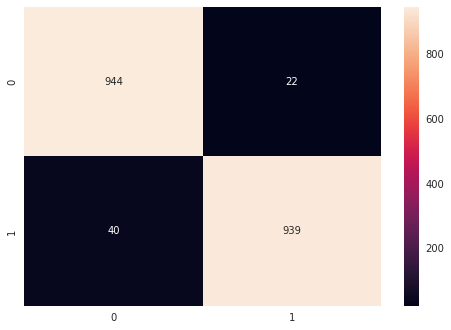

In [38]:
clf_rf = RandomForestClassifier(random_state=777)
clf_rf = clf_rf.fit(X_train,y_train)
y_pred_rf = clf_rf.predict(X_test)
acc = accuracy_score(y_test, y_pred_rf)
print('Testing-set Accuracy score is:', acc)
print('Training-set Accuracy score is:',accuracy_score(y_train,clf_rf.predict(X_train)))
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot = True, fmt = "d")

AdaBoost Classifier Model Accuracy is: 0.9172236503856042


<AxesSubplot:>

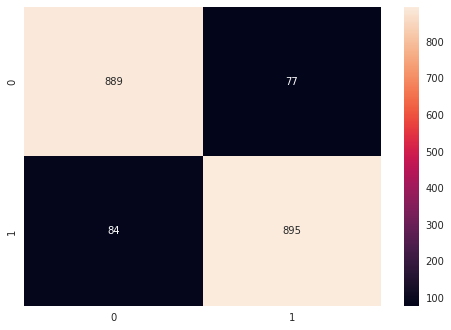

In [39]:
abc = AdaBoostClassifier(n_estimators = 50,
                         learning_rate = 1, 
                         random_state = 777)
abc.fit(X_train,y_train)
y_pred_abc = abc.predict(X_test)
acc = accuracy_score(y_test, y_pred_abc)
print('AdaBoost Classifier Model Accuracy is:',acc)
cm = confusion_matrix(y_test, y_pred_abc)
sns.heatmap(cm, annot = True, fmt="d")

Gradient Boosting Classifier Model Accuracy score is: 0.9475578406169666


<AxesSubplot:>

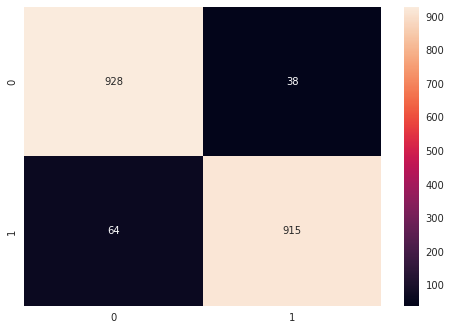

In [40]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
acc = accuracy_score(y_test, gb_pred)
print("Gradient Boosting Classifier Model Accuracy score is:", acc)
cm = confusion_matrix(y_test, gb_pred)
sns.heatmap(cm, annot = True, fmt="d")

KNN Model Acuuracy is: 0.9491002570694087


<AxesSubplot:>

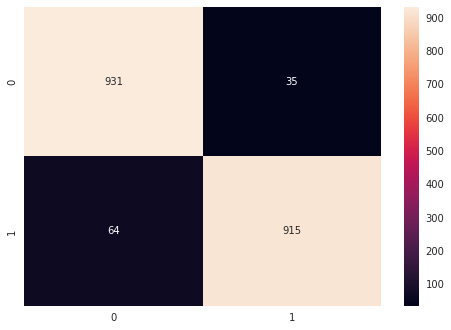

In [41]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
acc = knn.score(X_test, y_test)
print("KNN Model Acuuracy is:", acc)
cm = confusion_matrix(y_test, knn_pred)
sns.heatmap(cm, annot = True, fmt="d")

SVC Accuracy score is: 0.9465295629820052


<AxesSubplot:>

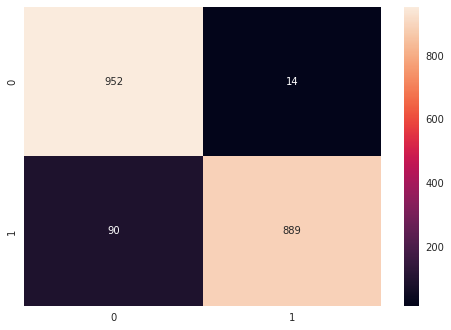

In [42]:
svc = SVC(random_state = 777)
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
acc = svc.score(X_test, y_test)
print("SVC Accuracy score is:", acc)
cm = confusion_matrix(y_test, svc_pred)
sns.heatmap(cm, annot = True, fmt = "d")

In [43]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
acc = lr.score(X_test, y_test)
print("LogisticRegression accuracy score is:",acc)
report = classification_report(y_test, lr_pred)
print(report)

LogisticRegression accuracy score is: 0.9244215938303342
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       966
           1       0.96      0.88      0.92       979

    accuracy                           0.92      1945
   macro avg       0.93      0.92      0.92      1945
weighted avg       0.93      0.92      0.92      1945



Decision Tree accuracy score is : 0.9398457583547558


<AxesSubplot:>

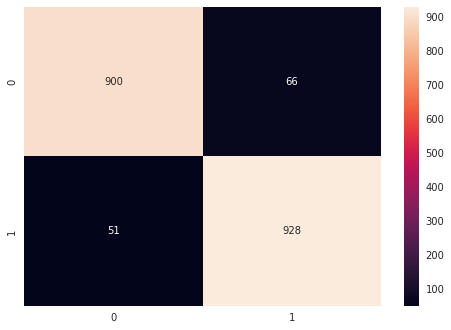

In [44]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
acc = accuracy_score(y_test, dt_pred)
print("Decision Tree accuracy score is :",acc)
cm = confusion_matrix(y_test, dt_pred)
sns.heatmap(cm, annot = True, fmt = "d")

0:	learn: 0.6474128	total: 56.1ms	remaining: 224ms
1:	learn: 0.5946898	total: 58.7ms	remaining: 88.1ms
2:	learn: 0.5613268	total: 61.1ms	remaining: 40.7ms
3:	learn: 0.5332584	total: 63.3ms	remaining: 15.8ms
4:	learn: 0.5033241	total: 65.4ms	remaining: 0us
Cat Boost Classifier accuracy score is: 0.87146529562982


<AxesSubplot:>

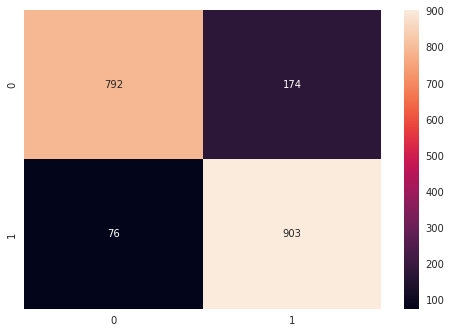

In [45]:
cbc = CatBoostClassifier( iterations=5, 
                          learning_rate=0.1 )
cbc = cbc.fit(X_train,y_train)
cbc_pred = cbc.predict(X_test)
acc = accuracy_score(y_test,cbc_pred)
print("Cat Boost Classifier accuracy score is:",acc)
cm = confusion_matrix(y_test,cbc_pred)
sns.heatmap(cm, annot = True, fmt = "d")

Voting Classifier Accuracy Score is: 
0.970694087403599


<AxesSubplot:>

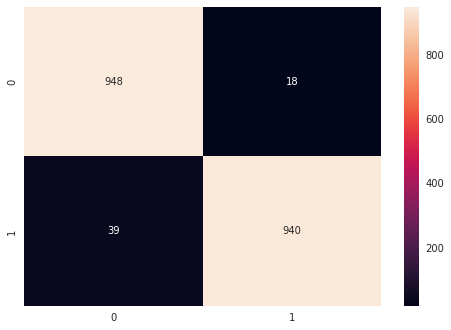

In [46]:
clf1 = GradientBoostingClassifier()
clf2 = RandomForestClassifier()
clf3 =  KNeighborsClassifier(n_neighbors = 10)
eclf1 = VotingClassifier(estimators=[('gbc', clf1), ('lr', clf2), ('abc', clf3)], voting='soft')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print("Voting Classifier Accuracy Score is: ")
print(accuracy_score(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot = True, fmt="d")